In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import utils as ut

system_name = 'sarsa_const'
run_name = 'state_of_the_art'
data_dir = './data/' + system_name + '/' + run_name + '/'
#plot_dir = '../plots/'+system_name+'/'+run_name+'/'

## Learning of the 3d kite - relative velocity angle- with sarsa

In [2]:
params = ut.read_params(data_dir+'parameters.txt')
for ep in params:
    print(ep, params[ep])

integration_step 0.001
episode_duration 300.0
learning_step 0.2
penalty 3000000.0
wind_type const
v_wind_x 12.0
v_wind_y 0.0
v_wind_z 0.0
learning_type sarsa
gamma 1.0
episodes 10.0
eta0 0.1
eta_decay_start 500000.0
eta_decay_rate 1.3
eps0 0.01
eps_decay_start 300000.0
eps_decay_rate 0.9
max_power 1000000.0


In [3]:
# read durations and returns
d_traj,= ut.read_traj(data_dir+'/return.txt')

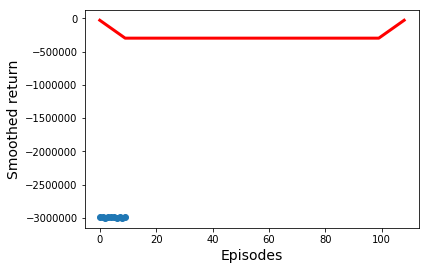

In [5]:
plt.xlabel('Episodes', fontsize=14)
plt.ylabel('Smoothed return', fontsize=14)

x = np.arange(len(d_traj))
plt.plot(r_traj, 'o')

smooth = np.convolve(r_traj, np.ones(100))/100
plt.plot(smooth, color='red', lw=3)

plt.savefig(data_dir+'return.png', dpi=200)
plt.show()